### Программа для занятий по информатике

Необходимые библиотеки: Pillow, numpy, matplotlib

Давайте реализуем считывание .bmp файла и преобразование его в numpy-массив:

In [110]:
from PIL import Image
import numpy as np

def bmp_to_array(path: str):
    img = Image.open(path)
    width, height = img.size
    pixels = np.array(img)
    return np.array([[
            (1 if (pixels[i][j] == [255, 255, 255]).all() else 0)
            for i in range(height)]
            for j in range(width)]), width, height

Функция, которая выбирает случайную доступную клетку:

In [116]:
def get_available_cell(field, width: int, height: int):
    available_cells = []
    for i in range(width):
        for j in range(height):
            if field[i][j] == 1:
                available_cells.append([i, j])
        
    return np.array(choice(available_cells))

Функция, которая возвращает numpy-массив, где $A[i]$ - удаленность точки от изнаальной позиции после i-й итерации.

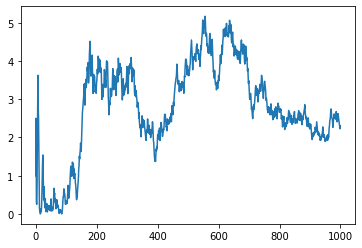

In [144]:
from matplotlib import pyplot
from random import choice

def get_distances(field, width, height, 
                  start_pos=get_available_cell(field, width, height),
                  iter_number=1_000):
    pos = start_pos.copy()
    possible_movements = [
        np.array([1, 1]),
        np.array([1, -1]),
        np.array([-1, 1]),
        np.array([-1, -1]),
        np.array([1, 0]),
        np.array([0, 1]),
        np.array([-1, 0]),
        np.array([0, -1])
    ]
    
    distances = []
    for i in range(iter_number):
        possible_positions = []
        for vector in possible_movements:
            try:
                temp_pos = pos + vector
                if (field[temp_pos[0]][temp_pos[1]] == 1).all():
                    possible_positions.append(temp_pos)

            except IndexError:
                continue
            
        if not possible_ways:
            continue
            
        pos = choice(np.array(possible_positions))
        v = pos - start_pos
        distances.append(v.dot(v) / (i + 1))
        
    return np.array(range(iter_number)), np.array(distances)

field, width, height = bmp_to_array('resources/hexagon_maze.bmp')
ox, oy = get_distances(field, width, height)
    
pyplot.plot(ox, oy)
pyplot.show()